# Group Project

In [239]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import tensorflow as tf

### Data Extraction 

In [240]:
#reading the text file
with open('ASTR19_S22_group_project_data.txt') as f:
    lines = f.readlines()[3:]
    
    x = [int(line.split()[0]) for line in lines] #Day of the year 
    y = [line.split()[1] for line in lines] #Time in hours:minutes
    z = [float(line.split()[2]) for line in lines] #Tide height in feet

f.close() #close the file

### Functions

In [241]:
#function
def f_line(x,a,b,c):
    return np.sin((x + a)/b) + c
    
#replace bad chars with a "."
def replace_bad_chars(input_array):
    bad_chars = [';', ':', '!', "*", " "]
    for i in range(len(input_array)):
        for j in bad_chars:
            input_array[i]= input_array[i].replace(j, '.')
    return input_array
    
#convert strings to floats 
def convert_strings_to_floats(input_array):
    output_array = []
    for element in input_array:
        converted_float = float(element)
        output_array.append(converted_float)
    return output_array
    
#sine() function
def sine():
    return np.sin((x+4)/2.2)+2.5

### Finding The Fit

Text(0, 0.5, 'y')

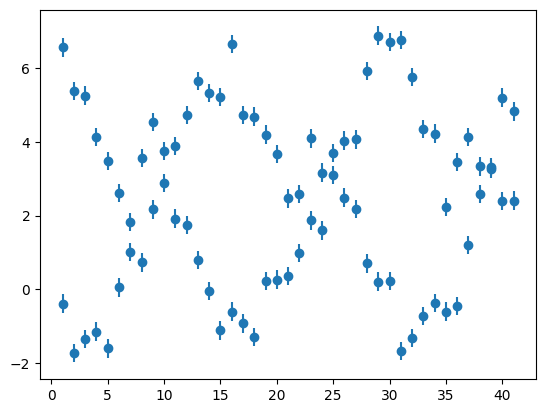

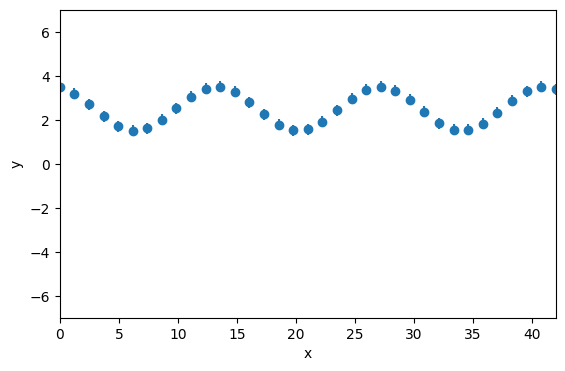

In [242]:
#convert y into floats
y = replace_bad_chars(y)
y = convert_strings_to_floats(y)

# plot error bar with the uncertainty 0.25
plt.errorbar(x,z,0.25,fmt='o')

x_1 = np.linspace(0.,42, 35)
a = 4.0
b = 2.2
c = 2.5
sig = 0.25

#plot figure
y_1 = np.sin((x_1+a)/b) + c
y_err = np.full(35, sig)
f = plt.figure().set_figheight(4)
plt.axis([0,42,-7,7])
plt.errorbar(x_1,y_1,yerr=y_err,fmt='o')
plt.xlabel('x')
plt.ylabel('y')

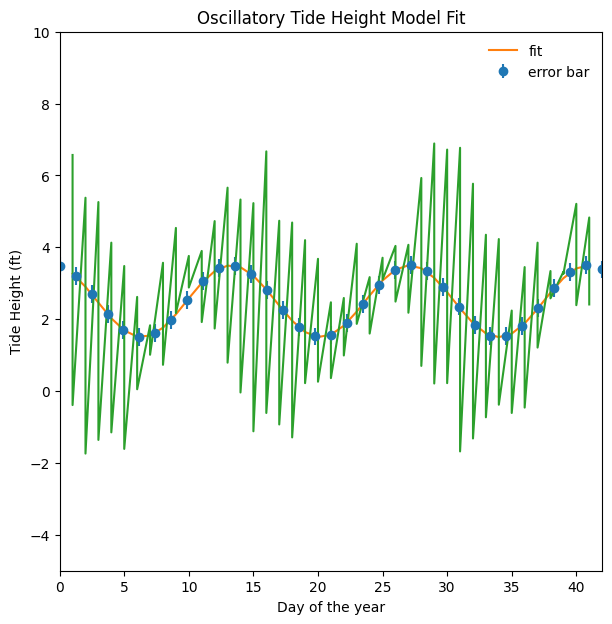

In [243]:
#fit the curve
params, params_cov = optimize.curve_fit(f_line,x_1,y_1,sigma=y_err,p0=[1,2.,0.1])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]

y_fit = np.sin((x + a_fit)/b_fit) + c_fit

#plot the figure
f = plt.figure(figsize=(7,7))
plt.errorbar(x_1,y_1,yerr=y_err,fmt='o',label='error bar')
plt.plot(x,y_fit,label='fit')
plt.xlabel('Day of the year')
plt.ylabel('Tide Height (ft)')
plt.title('Oscillatory Tide Height Model Fit')
plt.axis([0,42,-5,10])
plt.legend(loc=0,frameon=False)
plt.plot(x,z)

#save the figure as a PDF
plt.savefig("oscillary_tide_height_fit.PDF", bbox_inches="tight",facecolor="Blue")

### Residuals and Standard Deviation 

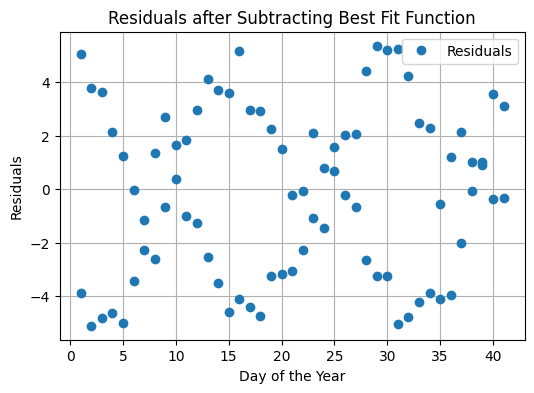

In [244]:
z = np.array(z)
idx_model = np.argsort(x)
y_data = z[idx_model]
y_model = np.sin((z[idx_model] + a_fit)/b_fit) + c_fit

#subtract the best fit from the data 
residuals = y_data - y_model

#plotting the residuals 
plt.figure(figsize=(6, 4))
plt.plot(x, residuals, 'o', label='Residuals')
plt.xlabel('Day of the Year')
plt.ylabel('Residuals')
plt.title('Residuals after Subtracting Best Fit Function')
plt.legend() 
plt.grid(True)
plt.show() 

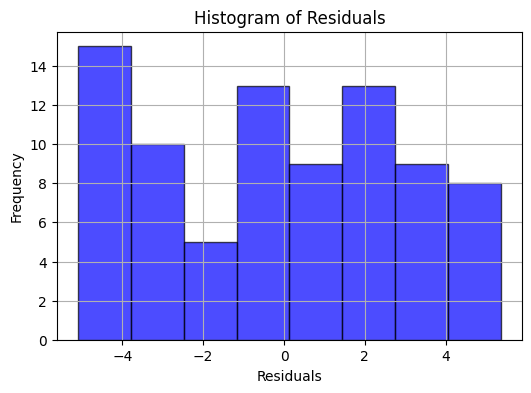

Standard Deviation of Residuals: 3.082


<Figure size 640x480 with 0 Axes>

In [257]:
#plot histogram of residuals 
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins='auto', color='blue', edgecolor='black', alpha=0.7)
#plt.axis([-6,6, 0,6])
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()
plt.savefig('histogramofresiduals.pdf')


#calculate the standard deviation of residuals
residuals_std = np.std(residuals)
print(f'Standard Deviation of Residuals: {residuals_std:.3f}')

In [251]:
#is the scatter in the data larger than the assumed experimental error? 
if residuals_std > 0.25:
    print("The scatter in the data is larger than the assumed experimental error.")
else:
    print("The scatter in the data is not larger than the assumed experimental error.")

#estimate intrinsic scatter in the data after accounting for the assumed measurement error
intrinsic_scatter = np.sqrt(residuals_std**2 - 0.25**2)
print(f"Estimated Intrinsic Scatter in the Data: {intrinsic_scatter:.3f}")

The scatter in the data is larger than the assumed experimental error.
Estimated Intrinsic Scatter in the Data: 3.072


### Tsunami Deviation Problem

In [258]:
#How large of a deviation is this tsunami, in terms of standard deviations of the distribution of normal tides from the model? 
#Add a single 2ft outlier to the histogram of data and replot it as part of your Jupyter notebook.

#Calculate deviation of the tsunami (2ft) in terms of standard deviations
tsunami_deviation = 2.0
deviation_in_std = tsunami_deviation / residuals_std

print(f'Standard Deviation: {deviation_in_std:.3f}')

#Add tsunami data point to residuals
tide_heights_with_tsunami = np.append(z, 2.0)
residuals_with_tsunami = tide_heights_with_tsunami - f_line(x, a_fit, b_fit, c_fit)

#Plot histogram of residuals with the tsunami outlier
plt.figure(figsize=(8, 6))
plt.hist(residuals_with_tsunami, bins='auto', color='cadetblue', edgecolor='darkslategray')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals with Tsunami Outlier of 2ft')
plt.grid(axis='y', linestyle='--', alpha=0.7) #adding gridding style
plt.show()

# Print the deviation of the tsunami in terms of standard deviations
print(f"Deviation of Tsunami from Model: {deviation_in_std} standard deviations")

Standard Deviation: 0.649


ValueError: operands could not be broadcast together with shapes (83,) (82,) 